<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas 1: *Clustering***

###**Tenggat Waktu: 8 Oktober 2022, 23.55 WIB**
</center>

### **Ketentuan:**
1. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dapat dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama Lengkap.ipynb**. Contoh: B_Tugas1_1906398881_Thariq Razan.ipynb.
2. Pengumpulan tugas dilakukan melalui slot submisi yang telah disediakan di SCeLe. Keterlambatan pengumpulan akan dikenakan penalti sesuai dengan ketentuan pada BRP.
3. Tugas ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
4. Soal yang akan dinilai telah diberikan penanda bobot maksimal agar Anda mengetahui berapa poin yang bisa didapatkan. 

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [60]:
# Isi dengan data diri Anda
NAMA = "Erick Ezrandy"
KELAS = "E"
NPM = "2006595892"

# Isi dengan NPM teman yang berdiskusi dengan Anda  
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan tugas ini
REFERENSI = []

In [61]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Erick Ezrandy dari kelas E dengan NPM 2006595892, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Erick Ezrandy)


## **Persiapan** [10 poin]
Pada tugas ini Anda akan diinstruksikan untuk melakukan *clustering* terhadap dataset yang telah disediakan di SCeLe. Sebelumnya, lakukan EDA untuk lebih memahami dataset tersebut. Lakukan pula *preprocessing* yang diperlukan. 

Dataset ini mengandung data yang diambil dari observasi ilmuwan terhadap penguin di Antarktika. Terdapat atribut seperti pulau habitat, tebal paruh, dan sebagainya. Pada tugas ini, bantulah ilmuwan untuk mengelompokkan penguin ke klaster tertentu!

In [62]:
# Impor library atau modul yang dibutuhkan pada tugas ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

1. Bukalah dataset dan tampilkan cuplikan dari dataset tersebut [1]

In [63]:
df = pd.read_csv('penguin.csv')
df

pulau_habitat  panjang_paruh_atas  tebal_paruh_atas  panjang_sirip  \
0       Torgersen                39.1              18.7          181.0   
1       Torgersen                39.5              17.4          186.0   
2       Torgersen                40.3              18.0          195.0   
3       Torgersen                 NaN               NaN            NaN   
4       Torgersen                36.7              19.3          193.0   
..            ...                 ...               ...            ...   
339        Biscoe                 NaN               NaN            NaN   
340        Biscoe                46.8              14.3          215.0   
341        Biscoe                50.4              15.7          222.0   
342        Biscoe                45.2              14.8          212.0   
343        Biscoe                49.9              16.1          213.0   

     massa_tubuh jenis_kelamin  
0         3750.0          MALE  
1         3800.0        FEMALE  
2         3250.0        FEMALE  
3            NaN           NaN  
4         3450.0        FEMALE  
..           ...           ...  
339          NaN           NaN  
340       4850.0        FEMALE  
341       5750.0          MALE  
342       5200.0        FEMALE  
343       5400.0          MALE  

[344 rows x 6 columns]

2. Tampilkan informasi dari dataset tersebut yang paling tidak mencakup jenis kolom dan jumlah *non-null cell* [1]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pulau_habitat       344 non-null    object 
 1   panjang_paruh_atas  342 non-null    float64
 2   tebal_paruh_atas    342 non-null    float64
 3   panjang_sirip       342 non-null    float64
 4   massa_tubuh         342 non-null    float64
 5   jenis_kelamin       334 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


3. Tampilkan statistika deskriptif dari dataset tersebut [1]

In [65]:
df.describe()

panjang_paruh_atas  tebal_paruh_atas  panjang_sirip  massa_tubuh
count          342.000000        342.000000     342.000000   342.000000
mean            43.921930         17.151170     200.915205  4201.754386
std              5.459584          1.974793      14.061714   801.954536
min             32.100000         13.100000     172.000000  2700.000000
25%             39.225000         15.600000     190.000000  3550.000000
50%             44.450000         17.300000     197.000000  4050.000000
75%             48.500000         18.700000     213.000000  4750.000000
max             59.600000         21.500000     231.000000  6300.000000

4. Lakukan penanganan terhadap *missing values* [2]

In [66]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

df.dropna(inplace=True)

5. Buatlah visualisasi untuk memahami distribusi data dari sebuah atribut dan memahami hubungan antar dua buah atribut [3]

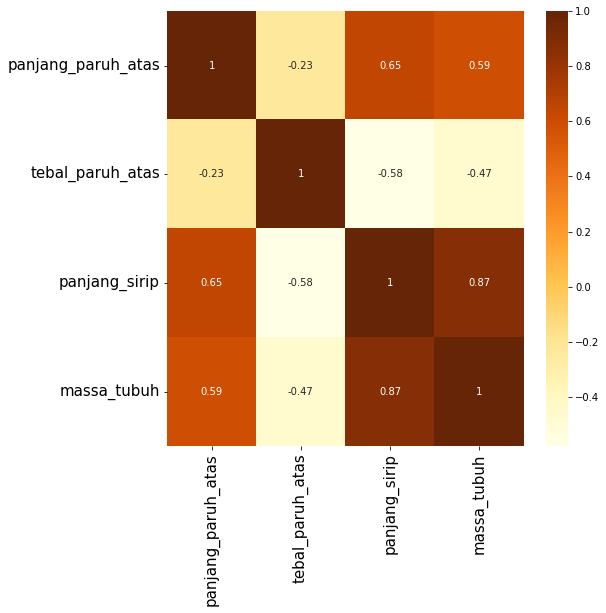

In [67]:
plt.figure(figsize=(8,8))
plt.xticks(size=15)
plt.yticks(size=15)
sns.heatmap(df.corr(method='pearson'), cmap='YlOrBr', annot=True)
plt.show()

6. Pilihlah paling tidak 2 atribut yang Anda ingin gunakan untuk penentuan klaster. Jelaskan alasan Anda memilih kombinasi atribut tersebut [2]

> panjang_sirip dan tebal_paruh_atas karena pasangan tersebut memiliki  nilai silhoutte terbesar dibandingkan dengan pasangan-pasangan lainnya.

> **Catatan**: Anda diharapkan untuk **bereksperimen** dengan pilihan atribut tersebut. Anda dapat lanjut ke bagian *clustering*, lalu kembali lagi ke bagian pemilihan atribut jika ingin mencoba kombinasi atribut yang berbeda. Pastikan jawaban akhir Anda dapat menghasilkan klaster yang **bermakna** (menghasilkan *insight* tertentu).

## **K-Means Clustering** [30 poin]
K-Means merupakan salah satu metode *clustering* yang paling populer. 'K' pada kata K-Means mengacu pada banyaknya kelompok yang ingin dibentuk. Menentukan nilai 'K' bersifat krusial karena memengaruhi kualitas *clustering*. Secara umum, kita dapat menerapkan K-Means secara manual dengan mengikuti langkah-langkah berikut: 
1. Menentukan nilai K dan memilih K buah centroid (titik pusat) secara acak
2. Mengelompokkan titik-titik data yang ada ke centroid terdekat
3. Menentukan ulang centroid dengan mengkalkulasi rata-rata data dari kelompok yang terbentuk
4. Mengulangi langkah 1-3 sampai memenuhi *stopping criteria*


7. Manfaatkan metrik *silhouette coefficient* untuk menentukan nilai K yang optimal (hint: lakukan *silhoutte analysis* terhadap nilai 2<=K<=6) [12]

In [68]:
half_raw_df = df.drop(['pulau_habitat','jenis_kelamin'], axis=1)
normalized_df = half_raw_df.apply(zscore)
second_df = normalized_df[['panjang_sirip', 'tebal_paruh_atas']]
# second_df
for i in range(2,7):
  clusterer = KMeans(n_clusters=i)
  cluster_labels = clusterer.fit_predict(second_df)

  silhouette_avg = silhouette_score(second_df, cluster_labels)
  print(f"For n_clusters = {i} and the average of silhouette_score is {silhouette_avg}")
  

For n_clusters = 2 and the average of silhouette_score is 0.6412203674282625
For n_clusters = 3 and the average of silhouette_score is 0.4999003981216313
For n_clusters = 4 and the average of silhouette_score is 0.4322168838869104
For n_clusters = 5 and the average of silhouette_score is 0.3955269048476019
For n_clusters = 6 and the average of silhouette_score is 0.4012042679066084


> Jumlah cluster yang digunakan adalah 2 karena silhouette_scorenya yang paling tinggi.

8. Terapkan metode K-Means kepada dataframe yang sudah Anda siapkan, gunakan nilai K yang Anda tentukan di atas [8]

In [69]:
cluster = KMeans(n_clusters=2)
cluster_labels = cluster.fit_predict(second_df)

# determine which cluster the data in that row belongs to
normalized_df['cluster'] = cluster_labels  
display(normalized_df)

centroids = cluster.cluster_centers_
print(centroids)

panjang_paruh_atas  tebal_paruh_atas  panjang_sirip  massa_tubuh  cluster
0             -0.897653          0.783487      -1.429521    -0.571229        1
1             -0.824290          0.121896      -1.072408    -0.509011        1
2             -0.677564          0.427246      -0.429605    -1.193405        1
4             -1.337831          1.088836      -0.572450    -0.944535        1
5             -0.860972          1.750427      -0.786718    -0.695664        1
..                  ...               ...            ...          ...      ...
338            0.587947         -1.761093       0.927425     0.890886        0
340            0.514584         -1.455743       0.998847     0.797560        0
341            1.174851         -0.743261       1.498806     1.917477        0
342            0.221132         -1.201285       0.784580     1.233083        0
343            1.083147         -0.539695       0.856002     1.481954        0

[334 rows x 5 columns]

[[ 1.15835787 -1.09822981]
 [-0.64954647  0.6158298 ]]


9. Visualisasikan klaster yang ada [5]

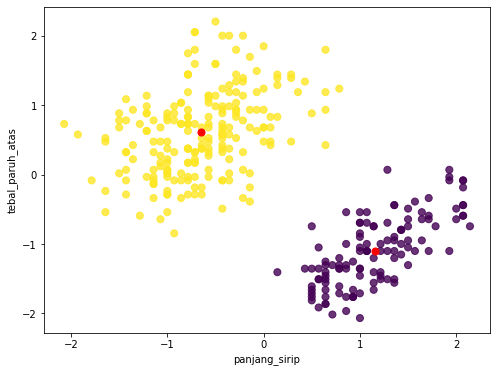

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(second_df['panjang_sirip'], second_df['tebal_paruh_atas'], c=cluster.labels_.astype(float), s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('panjang_sirip')
plt.ylabel('tebal_paruh_atas')
plt.show()

10. Berikan interpretasi dari klaster yang dihasilkan [5]
> Ketika kita membuat 2 cluster dari panjang_sirip dan tebal_paruh_atas maka cluster tersebut akan terlihat dengan jelas bahwa tidak ada data yang saling overlap dengan data di cluster lain. Namun, ketika kita menggunakan jumlah cluster > 2, maka akan data ada yang overlap dengan data di cluster lain dan hal tersebut tidaklah bagus. Itulah sebabnya mengapa saya menggunakan 2 cluster.

## **Hierarchical Clustering** [30 poin]
*Hierarchical clustering* adalah metode pengelompokkan data yang bertujuan untuk membuat klaster bertingkat. Metode ini termasuk ke dalam *unsupervised* ML layaknya metode K-Means. Namun, beda dengan metode K-Means, tidak diperlukan penentuan jumlah klaster diawal menjalankan metode ini. 

Secara umum, terdapat dua pendekatan dalam membentuk hierarki klaster, yakni *bottom-up* (agglomerative) dan *top-down* (divisive).


11. Terapkan *agglomerative clustering* tanpa mengatur jumlah klaster yang ingin dibentuk [8]


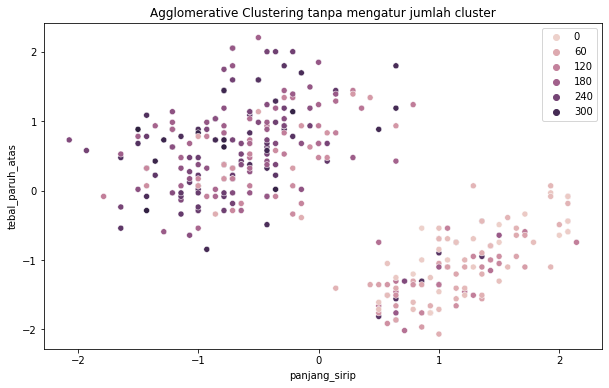

In [71]:
second_normalized_df = normalized_df[['panjang_sirip', 'tebal_paruh_atas']]

plt.figure(figsize=(10, 6))
clustering_without_clusters = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage="ward")
clustering_without_clusters.fit(second_normalized_df)
labels_without_clusters = clustering_without_clusters.labels_

sns.scatterplot(data=second_normalized_df, x='panjang_sirip', y='tebal_paruh_atas', hue=labels_without_clusters).set_title('Agglomerative Clustering tanpa mengatur jumlah cluster');

12. Tampilkan dendogram berdasarkan hasil *clustering* di atas. Dari hasil tersebut, apakah jumlah klaster optimal sama seperti hasil K-Means sebelumnya? Jelaskan hasilnya! (hint: tentukan ambang batas aglomerasi pada dendogram) [13]
> Ketika melihat dendogram di bawah, kita melihat bahwa ambang batas aglomerasi adalah 2 (dengan melihat jarak vertikal terjauh sebelum di-*merge*) sehingga jumlah klaster optimal sama seperti hasil K-Means

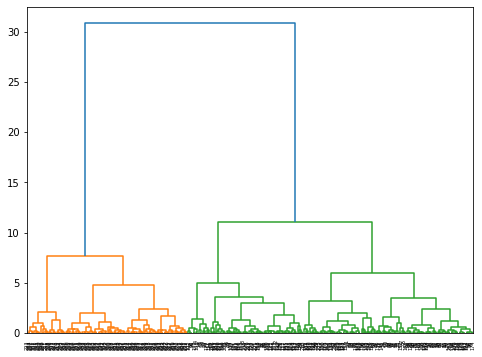

In [72]:
plt.figure(figsize=(8, 6))
dendrogram = sch.dendrogram(sch.linkage(second_normalized_df, method='ward'))

13. Terapkan kembali *agglomerative clustering*, namun aturlah jumlah klaster sesuai jawaban kalian di atas [5]

In [73]:
clustering_with_clusters = AgglomerativeClustering(n_clusters=2, linkage="ward")
clustering_with_clusters.fit(second_normalized_df)
labels_without_clusters = clustering_with_clusters.labels_

14. Visualisasikan hasil *clustering assignment* [4]

Text(0.5, 0, 'tebal_paruh_atas')

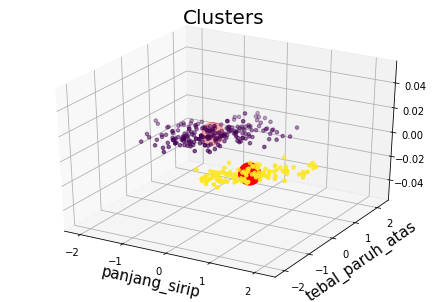

In [74]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
color = clustering_with_clusters.fit_predict(second_normalized_df)
ax.scatter(second_normalized_df['panjang_sirip'], second_normalized_df['tebal_paruh_atas'], c=color, s=50, marker='.')
ax.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=500)

ax.set_title('Clusters', fontsize= 20)
ax.set_xlabel('panjang_sirip', fontsize= 15)
ax.set_ylabel('tebal_paruh_atas', fontsize= 15)

## **Pertanyaan Teoretis** [30 poin]

**Pada bagian tugas ini, Anda diminta untuk menjawab pertanyaan yang telah diberikan di bawah ini.**

15. Jika suatu dataset mengandung campuran *categorical* dan *numerical* *feature*, penanganan apa yang bisa Anda lakukan terhadap *categorical feature* sebelum melakukan *clustering*? [8]
> Kita bisa melakukan label encoding atau one-hot encoding

16. Mengapa K-Means *clustering* kurang cocok jika diterapkan pada dataset yang struktur/bentuk penyebarannya tidak globular? [8]
> KMeans mengelompokkkan suatu titik berdasarkan jarak terdekat ke suatu centroid yang telah ditentukan. Hal tersebut akan efektif jika datanya spherical. Namun, jika datanya seperti di link https://drive.google.com/file/d/1qekquoo1esE7NplUV8GoRTCF6GL_Gs2A/view?usp=sharing, maka dengan menggunakan KMeans akan mendapatkan *clustering* seperti di link https://drive.google.com/file/d/1qZmWeuLwYLspHmbti3YNRjsHG-ifR6TX/view?usp=sharing. Terlihat bahwa *clustering* tersebut tidak menjadi akurat.

17. Apakah method KMeans dari sklearn akan memberikan hasil yang sama tiap kali dijalankan? Berikan penjelasan atau asumsi Anda terkait hal ini! [6]
> Tidak, karena posisi pusat centroid akan terus berubah seiring dengan bertambah atau berkurangnya suatu titik pada suatu cluster.

18. Jelaskan cara menghitung *intra-cluster similarity* dan *inter-cluster dissimilarity*! Secara umum, apakah yang membuat suatu klaster dianggap baik berdasarkan kedua metrik di atas? [8]
> *Intra-cluster similarity* mencari rata-rata jarak objek dalam kluster, sedangkan *inter-cluster dissimilarity* mencari rata-rata jarak minimum ke cluster lain. Suatu kluster dianggap baik jika nilai intra-clusternya besar dan inter-clusternya kecil.
